In [15]:
import torch

def loadtiff3d(filepath):
    """Load a tiff file into 3D numpy array"""

    import tifffile as tiff
    a = tiff.imread(filepath)

    stack = []
    for sample in a:
        stack.append(np.rot90(np.fliplr(np.flipud(sample))))
    out = np.dstack(stack)

    return out


def compute_confusion(gt, pred, threshold=40):
    gt = (gt > 0).astype('int')
    pred = (pred > threshold).astype('int')
    TP = np.sum(pred[gt == 1])
    FP = np.sum(pred[gt == 0])
    FN = np.sum(gt[pred == 0])
    if TP + FP == 0:
        precision = 0
    else:
        precision = TP / (TP + FP)
    if TP + FN == 0:
        recall = 0
    else:
        recall = TP / (TP + FN)
    f1 = 2 * 
    if np.isnan(precision):
        precision = 0
        f1 = 0
    if np.isnan(recall):
        recall = 0
        f1 = 0
    return precision, recall, f1, TP, FN, FP

In [44]:
import os
import numpy as np
prefix = '/home/donghao/Desktop/donghao_v2/3D_Synthetic_Neuron/checkpoints/3d_unet_pixel/test_full'
prefix_gt = '/home/donghao/Desktop/donghao_v2/3D_Synthetic_Neuron/datasets/datasets/fly/test_crop'
allfiles = os.listdir(prefix)
print(allfiles)
eva_metric_array = []
for file in allfiles:
    filepath = os.path.join(prefix, file)
    pred_im = loadtiff3d(filepath)
    pred_im = pred_im / 255
    print('max and min intensity value of pred im', np.max(pred_im), np.min(pred_im))
    print('the shape of current prediction is', pred_im.shape)
    im_num = file.split('_')[0]
    print(im_num)
    gt_file_name = im_num + '_gt.tif'
    gt_filepath = os.path.join(prefix_gt, gt_file_name)
    gt_im = loadtiff3d(gt_filepath)
    gt_im = gt_im / 255
    print('the shape of ground truth is', gt_im.shape)
    #single evulation metric 
    sin_eva = compute_confusion(gt=gt_im, pred=pred_im, threshold=30)
    print('single evaluation metric', sin_eva)

['40_fake_B.tif', '16_fake_B.tif', '33_fake_B.tif', '20_fake_B.tif', '22_fake_B.tif']
max and min intensity value of pred im 1.0 0.0
the shape of current prediction is (65, 105, 96)
40
the shape of ground truth is (65, 105, 96)
single evaluation metric (0, 0.0, 0, 9191, 0)
max and min intensity value of pred im 1.0 0.0
the shape of current prediction is (207, 175, 151)
16
the shape of ground truth is (207, 175, 151)
single evaluation metric (0, 0.0, 0, 11970, 0)
max and min intensity value of pred im 1.0 0.0
the shape of current prediction is (153, 203, 118)
33
the shape of ground truth is (153, 203, 118)
single evaluation metric (0, 0.0, 0, 11923, 0)
max and min intensity value of pred im 1.0 0.0
the shape of current prediction is (190, 241, 127)
20
the shape of ground truth is (190, 241, 127)
single evaluation metric (0, 0.0, 0, 13794, 0)
max and min intensity value of pred im 1.0 0.0
the shape of current prediction is (147, 209, 207)
22
the shape of ground truth is (147, 209, 207)
s

In [88]:
# 0 0.1 0.2 ... 1
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
threshold_array = np.linspace(start=0, stop=1, num=10)
print(threshold_array)
eva_metric_array = []
for counter, thres in enumerate(threshold_array):
    eva = np.asarray(compute_confusion(gt=gt_im,
                            pred=pred_im,
                            threshold=thres))
    eva = np.expand_dims(eva, axis=1)
    if counter == 0:
        eva_metric_array = eva
    else:
        eva_metric_array = np.concatenate((eva_metric_array, eva), axis=1)
    print(eva_metric_array.shape, eva.shape)
    
plt.xlabel('Threshold Interval')
# plt.ylabel('F1 Score')
# plt.scatter(threshold_array, threshold_array)
plt.plot(threshold_array, eva_metric_array[5, "r", label='label1')
plt.legend(loc="best")
plt.show()

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
(5, 1) (5, 1)
(5, 2) (5, 1)
(5, 3) (5, 1)
(5, 4) (5, 1)
(5, 5) (5, 1)
(5, 6) (5, 1)
(5, 7) (5, 1)
(5, 8) (5, 1)
(5, 9) (5, 1)
(5, 10) (5, 1)


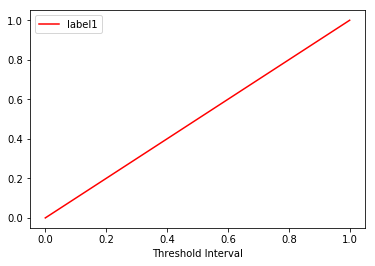

In [77]:
print(eva.shape)
print(eva_metric_array.shape)

(5, 1)
(5, 2, 1)
